# Add a new plugin

By default, the library will import all the files with prefix "plugin\_\*.py" from src/synthcity/plugins, and load all the classes which implement the [Plugin interface](src/synthcity/plugins/core/plugin.py).

Each plugin must implement the following methods:
- hyperparameter_space() - a static method that returns the hyperparameters that can be tuned during AutoML.
- type() - a static method that returns the type of the plugin. e.g., debug, generative, bayesian, etc.
- name() - a static method that returns the name of the plugin. e.g., ctgan, random_noisee, etc.
- _fit() - internal method, called by `fit` on each training set.
- _generate() - internal method, called by `generate`.

In [ ]:
# !pip install synthcity
# !pip uninstall -y torchaudio torchdata

## Existing plugins

In [1]:
# synthcity absolute
from synthcity.plugins import Plugins

generators = Plugins()

generators.list()

e:\qycache\anaconda\envs\LLM\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


[2025-04-24T15:40:18.736243+0800][9060][CRITICAL] module disabled: e:\qycache\anaconda\envs\LLM\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


['survival_nflow',
 'adsgan',
 'bayesian_network',
 'great',
 'fflows',
 'timegan',
 'arf',
 'pategan',
 'marginal_distributions',
 'privbayes',
 'ctgan',
 'survae',
 'tvae',
 'image_adsgan',
 'radialgan',
 'nflow',
 'dpgan',
 'decaf',
 'image_cgan',
 'timevae',
 'survival_gan',
 'survival_ctgan',
 'dummy_sampler',
 'ddpm',
 'uniform_sampler',
 'aim',
 'rtvae']

## Example plugin: Generate 0-1

In [2]:
# stdlib
from typing import Any, List

# third party
import numpy as np
import pandas as pd

# synthcity absolute
from synthcity.plugins.core.dataloader import DataLoader, GenericDataLoader
from synthcity.plugins.core.distribution import Distribution
from synthcity.plugins.core.plugin import Plugin
from synthcity.plugins.core.schema import Schema


In [3]:
import sys
import os

In [ ]:

package_path = '../CTAB-GAN-main'

sys.path.append(package_path)

from model.ctabgan import CTABGAN
# Importing the evaluation metrics 
from model.eval.evaluation import get_utility_metrics,stat_sim,privacy_metrics
# Importing standard libraries
import numpy as np
import pandas as pd
import glob

In [ ]:
# real_path = "../CTAB-GAN-main/Real_Datasets/train2.csv"
# df = pd.read_csv(real_path)
# numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

In [ ]:
import pandas as pd
#real_path = "../CTAB-GAN-main/Real_Datasets/train2.csv"
real_path = "../synthcity-main/tutorials/covertype_preprocessed.csv"

df = pd.read_csv(real_path)

columns = df.columns.tolist()

list1 = columns[:11]

list2 = columns[11:]

print(list1)
print(list2)

In [ ]:
#real_path = "../CTAB-GAN-main/Real_Datasets/Adult3.csv"
#real_path = "../CTAB-GAN-main/Real_Datasets/creditcard2.csv"
#real_path = '../CTGAN-main/CTGAN-main/Adult_datasets.csv'
real_path = '../CTGAN-main/CTGAN-main/examples/csv/train_clean.csv'
#real_path = r"C:\Users\26332\Desktop\Churn_Modelling_processed.csv"
#real_path = "../CTAB-GAN-main/Real_Datasets/train2.csv"
#real_path = "../CTAB-GAN-main/Real_Datasets/Credit.csv"
#real_path = "G:/DataSets/Adult.csv"
# real_path = "G:/DataSets/Churn.csv"
class CTABGANPlugin(Plugin):
    """Dummy plugin for debugging."""

    def __init__(
        self,
        n_iter: int = 200,
        cat_limit: int = 15,
        **kwargs: Any
    ) -> None:
        super().__init__(**kwargs)
        self.cat_limit = cat_limit
        # self.model = CTABGAN(
        #     raw_csv_path = real_path,
        #     test_ratio = 0.20,
        #     categorical_columns = [ 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income'],
        #     log_columns = [],
        #     mixed_columns= {'capital-loss':[0.0],'capital-gain':[0.0]},
        #     integer_columns = ['age', 'fnlwgt','capital-gain', 'capital-loss','hours-per-week'],
        #     problem_type= {"Classification": 'income'},
        #     epochs=n_iter
        # )
        self.model = CTABGAN(
            raw_csv_path = real_path,
            test_ratio = 0.20,
            categorical_columns = ['Pclass','Sex','SibSp','Parch','Embarked'],
            log_columns = [],
            mixed_columns= {},
            integer_columns = ['Age','Fare'],
            problem_type= {"Classification": 'Survived'},
            epochs=n_iter
        )
        # self.model = CTABGAN(
        #     raw_csv_path = real_path,
        #     test_ratio = 0.20,
        #     categorical_columns = list2,
        #     log_columns = [],
        #     mixed_columns= {},
        #     integer_columns = list1,
        #     problem_type= {"Classification": 'Cover_Type'},
        #     epochs=n_iter
        # )
        # self.model = CTABGAN(
        #     raw_csv_path = real_path,
        #     test_ratio = 0.20,
        #     categorical_columns = [],
        #     log_columns = [],
        #     mixed_columns= {},
        #     integer_columns = [],
        #     problem_type= {"Classification": 'Amount'},
        #     epochs=n_iter
        # )
        # self.model = CTABGAN(
        #     raw_csv_path = real_path, 
        #     test_ratio = 0.20,
        #     categorical_columns = [
        #         'Geography_Germany', 
        #         'Geography_Spain',
        #         'Gender_Male',
        #         'HasCrCard',
        #         'IsActiveMember'
        #     ],
        #     log_columns = [],
        #     mixed_columns= {},
        #     integer_columns = [
        #         'CreditScore',     
        #         'Age',
        #         'Tenure',  
        #         'NumOfProducts',
        #         'EstimatedSalary'
        #     ],
        #     problem_type= {"Classification": 'Exited'},
        #     epochs=n_iter
        # )
    @staticmethod
    def name() -> str:
        return "ctab-gan"

    @staticmethod
    def type() -> str:
        return "debug"

    @staticmethod
    def hyperparameter_space(*args: Any, **kwargs: Any) -> List[Distribution]:
        return []

    def _fit(self,X: DataLoader ,*args: Any, **kwargs: Any) -> "CTABGANPlugin":
        self.model.fit()
        return self

    def _generate(self, count: int, syn_schema: Schema, **kwargs: Any):
        return self._safe_generate(self.model.generate_samples, count, syn_schema)

In [6]:
# synthcity absolute
from synthcity.plugins import Plugins
generators = Plugins()
generators.list()

[2025-04-23T22:33:13.723288+0800][25784][CRITICAL] module disabled: e:\qycache\anaconda\envs\LLM\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


['tvae',
 'survival_gan',
 'survival_nflow',
 'arf',
 'ctgan',
 'image_adsgan',
 'pategan',
 'marginal_distributions',
 'dummy_sampler',
 'timegan',
 'ddpm',
 'aim',
 'dpgan',
 'adsgan',
 'survival_ctgan',
 'fflows',
 'radialgan',
 'great',
 'image_cgan',
 'timevae',
 'bayesian_network',
 'decaf',
 'uniform_sampler',
 'privbayes',
 'rtvae',
 'survae',
 'nflow']

In [7]:
generators.add("ctab-gan", CTABGANPlugin)
generators.list()

['tvae',
 'survival_gan',
 'ctab-gan',
 'survival_nflow',
 'arf',
 'ctgan',
 'image_adsgan',
 'pategan',
 'marginal_distributions',
 'dummy_sampler',
 'timegan',
 'ddpm',
 'aim',
 'dpgan',
 'adsgan',
 'survival_ctgan',
 'fflows',
 'radialgan',
 'great',
 'image_cgan',
 'timevae',
 'bayesian_network',
 'decaf',
 'uniform_sampler',
 'privbayes',
 'rtvae',
 'survae',
 'nflow']

In [ ]:
data = pd.read_csv(real_path)
#data = pd.read_csv('../CTGAN-main/CTGAN-main/examples/csv/train_clean.csv')
#data = pd.read_csv('../CTGAN-main/CTGAN-main/Adult_datasets.csv')
loader = GenericDataLoader(data)

In [9]:
# Train the new plugin
from torch.nn import TransformerEncoder
gen = generators.get("ctab-gan", n_iter=200)

In [10]:
gen.fit(loader)
# Generate some new data

100%|██████████| 200/200 [06:14<00:00,  1.87s/it]

Finished training in 377.4869341850281  seconds.


In [11]:
a = gen.generate(count=10000).dataframe()
a.to_csv('G:/DataSets/Fake_Dataset/CTABGAN-Churn200epochs.csv', index=False)

In [ ]:
# a.to_csv('./fakeData_CTABGAN-covertype.csv', index=False)
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# correlation_matrix_real = data.corr()
# sns.heatmap(correlation_matrix_real, annot=False, cmap='coolwarm')
# plt.title('Correlation Matrix Heatmap--Real_data')
# plt.show()

In [ ]:
# correlation_matrix_fake = a.corr()
# sns.heatmap(correlation_matrix_fake, annot=False, cmap='coolwarm')
# plt.title('Correlation Matrix Heatmap--Fake_data')
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# gen.plot(plt, loader)

# plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------

TransCTGAN

In [1]:
# stdlib
from typing import Any, List

# third party
import numpy as np
import pandas as pd
from ctgan import CTGAN,EnhancedCTGAN
from torch.nn import TransformerEncoder
# synthcity absolute
from synthcity.plugins.core.dataloader import DataLoader, GenericDataLoader
from synthcity.plugins.core.distribution import Distribution
from synthcity.plugins.core.plugin import Plugin
from synthcity.plugins.core.schema import Schema
from synthcity.plugins.core.distribution import (
    Distribution,
    IntegerDistribution,
)


class sdv_ctgan_plugin(Plugin):
    """SDV CTGAN integration in synthcity."""

    def __init__(
        self,
        embedding_n_units: int = 128,
        epochs: int = 150,
        batch_size: int = 100,
        cat_limit: int = 25,
        dropout = 0.1,
        num_first = False,
        batch_first = False,
        num_layers = 1,
        num_heads = 2,
        hidden_dim = 256,
        **kwargs: Any
    ) -> None:
        super().__init__(**kwargs)
        self.cat_limit = cat_limit
        self.model = EnhancedCTGAN(
            embedding_dim=embedding_n_units,
            batch_size=batch_size,
            epochs=epochs,
            verbose=False,
            dropout = dropout,
            num_first = num_first,
            batch_first = batch_first,
            num_layers = num_layers,
            num_heads = num_heads,
            hidden_dim = hidden_dim
        )

    @staticmethod
    def name() -> str:
        return "trans_ctgan"

    @staticmethod
    def type() -> str:
        return "debug"

    @staticmethod
    def hyperparameter_space(**kwargs: Any) -> List[Distribution]:
        """
        We can customize the hyperparameter space, and use it in AutoML benchmarks.
        """
        return [
            IntegerDistribution(name="embedding_n_units", low=100, high=500, step=50),
            IntegerDistribution(name="batch_size", low=100, high=300, step=50),
            IntegerDistribution(name="epochs", low=100, high=500, step=50),
        ]

    def _fit(self, X: DataLoader, *args: Any, **kwargs: Any) -> "sdvPlugin":
        """We selected the discrete columns based on the count of unique values, and train the CTGAN"""
        discrete_columns = []

        for col in X.columns:
            if len(X[col].unique()) < self.cat_limit:
                discrete_columns.append(col)
        from torch.nn import TransformerEncoder
        self.model.fit(X.dataframe(), discrete_columns=discrete_columns)
        return self

    def _generate(self, count: int, syn_schema: Schema, **kwargs: Any) -> pd.DataFrame:
        return self._safe_generate(self.model.sample, count, syn_schema)

e:\qycache\anaconda\envs\LLM\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


In [2]:
# synthcity absolute
from synthcity.plugins import Plugins
generators = Plugins()
generators.list()

[2025-04-29T15:39:47.848887+0800][35368][CRITICAL] module disabled: e:\qycache\anaconda\envs\LLM\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


['adsgan',
 'survival_gan',
 'fflows',
 'dummy_sampler',
 'great',
 'privbayes',
 'arf',
 'survival_ctgan',
 'survival_nflow',
 'timegan',
 'marginal_distributions',
 'nflow',
 'ctgan',
 'rtvae',
 'pategan',
 'image_cgan',
 'tvae',
 'aim',
 'image_adsgan',
 'timevae',
 'survae',
 'ddpm',
 'decaf',
 'radialgan',
 'bayesian_network',
 'dpgan',
 'uniform_sampler']

In [3]:
generators.add("trans_ctgan", sdv_ctgan_plugin)
generators.list()

['adsgan',
 'trans_ctgan',
 'survival_gan',
 'fflows',
 'dummy_sampler',
 'great',
 'privbayes',
 'arf',
 'survival_ctgan',
 'survival_nflow',
 'timegan',
 'marginal_distributions',
 'nflow',
 'ctgan',
 'rtvae',
 'pategan',
 'image_cgan',
 'tvae',
 'aim',
 'image_adsgan',
 'timevae',
 'survae',
 'ddpm',
 'decaf',
 'radialgan',
 'bayesian_network',
 'dpgan',
 'uniform_sampler']

In [ ]:
from sklearn.datasets import load_breast_cancer,load_diabetes
#real_path = "../CTAB-GAN-main/Real_Datasets/Adult3.csv"
#real_path = '../CTGAN-main/CTGAN-main/examples/csv/train_clean.csv'
#real_path = r"..\datasets\diabetic_data.csv\processed_diabetic_data.csv"
#real_path = "../CTAB-GAN-main/Real_Datasets/CreditLong2.csv"
real_path = "../synthcity-main/tutorials/covertype_preprocessed.csv"
#real_path = "../CTAB-GAN-main/Real_Datasets/train2.csv"
#real_path = "../CTAB-GAN-main/Real_Datasets/creditcard2.csv"
#real_path = r"C:\Users\26332\Desktop\Churn_Modelling_processed.csv"
#real_path = "G:/DataSets/Churn.csv"
#real_path = "G:/DataSets/Credit150k.csv"
#real_path = "G:/DataSets/Adult.csv"
# real_path = 'G:/DataSets/adult_processed_0.csv'
#real_path = "G:/DataSets/newadu-10k.csv"
data = pd.read_csv(real_path)
loader = GenericDataLoader(data)
#loader = GenericDataLoader(real_data_normalized)

In [5]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())


2.2.1
True


In [6]:
# Train the new plugin
from torch.nn import TransformerEncoder
gen = generators.get("trans_ctgan", epochs=200)

In [ ]:
#"E:\qycache\anaconda\envs\LLM\Lib\site-packages\ctgan\synthesizers\ctgan.py" 
gen.fit(loader)

  0%|          | 0/200 [00:00<?, ?it/s]
Hype-parameter:[dropout:0.1,num_first:False,batch_first:False,num_heads:2,num_layers:1,hidden_dim:256]
epoch!0
Epoch 0 - Generator Loss: 1.3665, Discriminator Loss: -0.4695, Corr Loss: 8.9092
epoch!1
Epoch 1 - Generator Loss: 1.4095, Discriminator Loss: -0.2234, Corr Loss: 10.4387
epoch!2
Epoch 2 - Generator Loss: 1.2050, Discriminator Loss: 0.0140, Corr Loss: 10.1677
epoch!3
Epoch 3 - Generator Loss: 1.4645, Discriminator Loss: -0.2203, Corr Loss: 9.8172
epoch!4
Epoch 4 - Generator Loss: 1.3503, Discriminator Loss: 0.1368, Corr Loss: 11.0288
epoch!5
Epoch 5 - Generator Loss: 1.2750, Discriminator Loss: -0.1759, Corr Loss: 10.1822
epoch!6
Epoch 6 - Generator Loss: 1.4279, Discriminator Loss: 0.0494, Corr Loss: 9.6297
epoch!7
Epoch 7 - Generator Loss: 1.3191, Discriminator Loss: -0.0346, Corr Loss: 9.4067
epoch!8
Epoch 8 - Generator Loss: 1.2580, Discriminator Loss: 0.0450, Corr Loss: 10.3610
epoch!9
Epoch 9 - Generator Loss: 1.5982, Discriminator

In [12]:
# Generate some new data
a = gen.generate(count=2000).dataframe()
a.to_csv('G:/DataSets/Fake_Dataset/Synthcity-transctgan-usedcover_4.csv', index=False)

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# real_path = "../CTAB-GAN-main/Real_Datasets/Adult3.csv"
# #real_path = '../CTGAN-main/CTGAN-main/examples/csv/train_clean.csv'
# #real_path = "../CTAB-GAN-main/Real_Datasets/Credit.csv"
# #real_path = "../synthcity-main/tutorials/covertype_preprocessed.csv"
# real_data = pd.read_csv(real_path)
# correlation_matrix_real = real_data.corr()
# sns.heatmap(correlation_matrix_real, annot=False, cmap='coolwarm')
# plt.title('Correlation Matrix Heatmap--Real_data')
# plt.show()

In [ ]:
# # TVAE-Adu_5.csv
# # DDPM-Adu_1.csv
# # CTABGAN-Adu_5.csv
# # OriginalCTGAN-Adu_5.csv
# # newTrans-Adu-2.csv
# fake_path = "../synthcity-main/tutorials/newTrans-Adu-2.csv"
# fake_data = pd.read_csv(fake_path)
# correlation_matrix_fake = fake_data.corr()
# sns.heatmap(correlation_matrix_fake, annot=False, cmap='coolwarm')
# plt.title('Correlation Matrix Heatmap--Fake_data')
# plt.show()

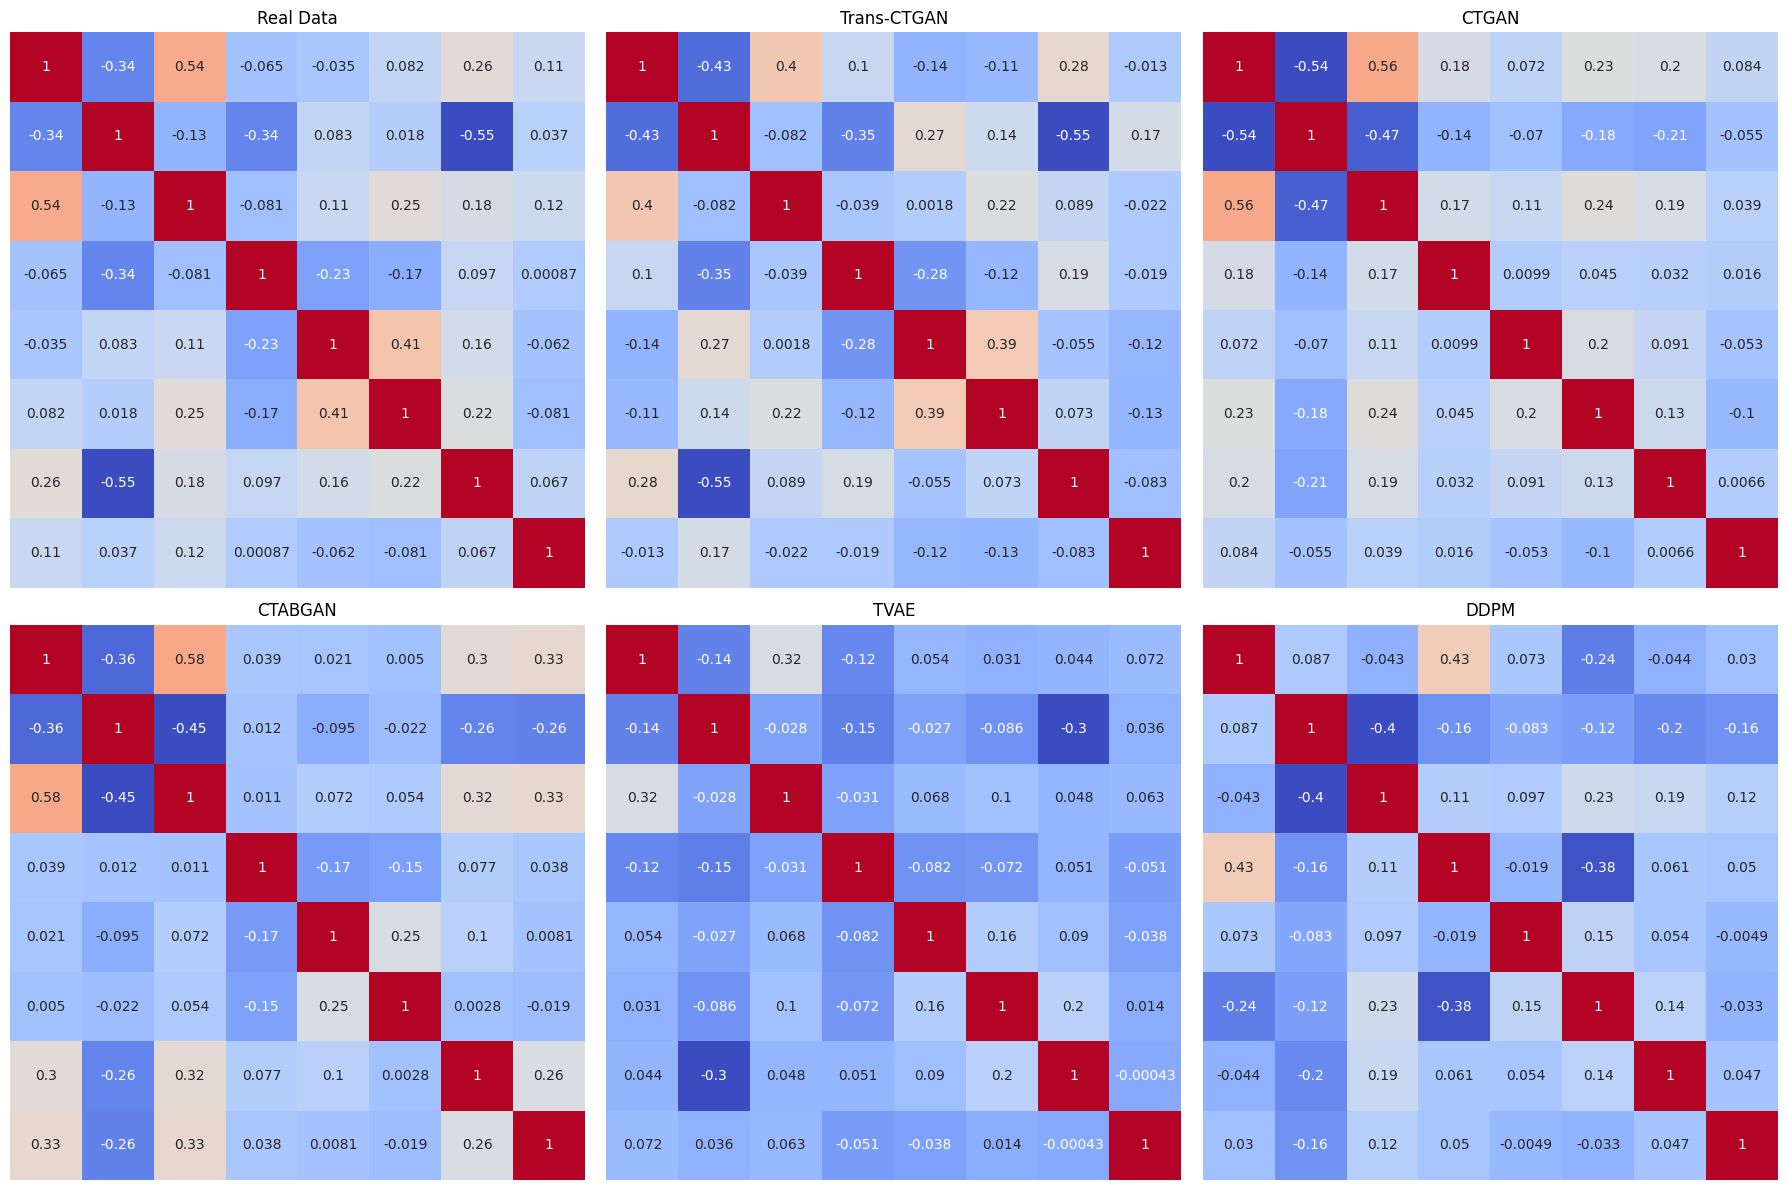

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_heatmaps(real_path, generated_paths):

    fig = plt.figure(figsize=(18, 12)) 
    
    real_data = pd.read_csv(real_path)
    correlation_matrix_real = real_data.corr()
    ax1 = plt.subplot(2, 3, 1)
    sns.heatmap(correlation_matrix_real, annot=True, cmap='coolwarm', cbar=False)
    plt.title('Real Data', fontsize=12)
    plt.xticks([])
    plt.yticks([])
    list=['1','Trans-CTGAN','CTGAN','CTABGAN','TVAE','DDPM']
    for idx, generated_path in enumerate(generated_paths, start=1):
        generated_data = pd.read_csv(generated_path)
        correlation_matrix_generated = generated_data.corr()
        ax = plt.subplot(2, 3, idx + 1)
        sns.heatmap(correlation_matrix_generated, annot=True, cmap='coolwarm', cbar=False)
        plt.title(f'{list[idx]}', fontsize=12)
        plt.xticks([])
        plt.yticks([])

    plt.subplots_adjust(wspace=0.3, hspace=0.3) 
    plt.tight_layout()
    plt.show()

# real_path = "../CTAB-GAN-main/Real_Datasets/Adult3.csv"
# generated_paths = [
#     "../synthcity-main/tutorials/newTrans-Adu-2.csv",
#     "../synthcity-main/tutorials/OriginalCTGAN-Adu_5.csv",
#     "../synthcity-main/tutorials/CTABGAN-Adu_5.csv",
#     "../synthcity-main/tutorials/TVAE-Adu_5.csv",
#     "../synthcity-main/tutorials/DDPM-Adu_1.csv"
# ]
real_path = '../CTGAN-main/CTGAN-main/examples/csv/train_clean.csv'
generated_paths = [
    "../synthcity-main/tutorials/duanwen-trans-tit.csv ",
    "../synthcity-main/tutorials/OriginalCTGAN-Tit_5.csv",
    "../synthcity-main/tutorials/CTABGAN-Tit_5.csv",
    "../synthcity-main/tutorials/TVAE-Tit_5.csv",
    "../synthcity-main/tutorials/DDPM-Titanic_1.csv"
]
# real_path = "../CTAB-GAN-main/Real_Datasets/Credit.csv"
# generated_paths = [
#     "../synthcity-main/tutorials/newtrans_calc_pro_cre1.csv",
#     "../synthcity-main/tutorials/OriginalCTGAN-Credit_31.csv",
#     "../synthcity-main/tutorials/CTABGAN-Credit0_31.csv",
#     "../synthcity-main/tutorials/TVAE-Cre_1.csv",
#     "../synthcity-main/tutorials/DDPM-KL-credit200.csv"
# ]
# real_path = "../synthcity-main/tutorials/covertype_preprocessed.csv"
# generated_paths = [
#     "../synthcity-main/tutorials/newtrans_calc_pro_cov.csv",
#     "../synthcity-main/tutorials/octgan-cover200.csv",
#     "../synthcity-main/tutorials/CTABGAN-cover200.csv",
#     "../synthcity-main/tutorials/TVAE-cover-5.csv",
#     "../synthcity-main/tutorials/DDPM-cover-5.csv"
# 
plot_correlation_heatmaps(real_path, generated_paths)

In [ ]:
# import matplotlib.pyplot as plt

# gen.plot(plt, loader)

# plt.show()

In [ ]:
# # synthcity absolute
# from synthcity.benchmark import Benchmarks

# score = Benchmarks.evaluate(
#     [
#         ("ctab-gan","ctab-gan", {}),
#         ("tvae", "tvae", {}),
#         ("ctgan", "ctgan", {}),
#         ("ddpm", "ddpm", {}),
#         ("trans_ctgan", "trans_ctgan", {}),
#     ],
#     loader,
#     synthetic_size=1000,
#     repeats=2,
# )
# #("trans_ctgan", "trans_ctgan", {}),
# # score = Benchmarks.evaluate(
# #     [
# #         ("tvae", "tvae", {}),
# #         ("ctgan", "ctgan", {}),
# #         ("ddpm", "ddpm", {}),
# #     ],
# #     loader,
# #     synthetic_size=1000,
# #     repeats=2,
# # )

In [ ]:
# Benchmarks.print(score)

In [ ]:
# Benchmarks.highlight(score1)

---------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# # Custom generation constraints

# # synthcity absolute
# from synthcity.plugins.core.constraints import Constraints

# constraints = Constraints(rules=[("worst radius", ">", 15)])

# generated = gen.generate(count=10, constraints=constraints)

# assert (generated["worst radius"] > 15).any()

# generated.dataframe()